In [38]:
import numpy as np
import cv2
import os
import imageio
from matplotlib import pyplot as plt
from math import sqrt
import re
%matplotlib inline

In [12]:
main_folder = 'Data\\sample3\\'

#### original data stored in folder named 'Original' inside the main_folder

when needed, used the following function to create new folder inside the main_folder

#### folder created in this script:
pad: store processed image data with ideal size and oritentation

crop: store cropped images


In [28]:
def ensure_dir(file_path): # create a folder if the folder is not already exist
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)

#### Set the required size to large images and small images

In [32]:
target_size = 1024 # pad images to 1024 x 1024
N_pieces = 16 # crop each images to 16 patches

## Read data

In [13]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        f = os.path.join(folder,filename)
        img =cv2.imread(f, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
    return images

In [15]:
data = load_images_from_folder(main_folder+'Original') # 
print ('original size:', np.shape(data))

original size: (998, 52, 982)


## Clean data to ideal shape

#### 1. Change the long axis to the main direction

change axis to size: (998, 982, 52)


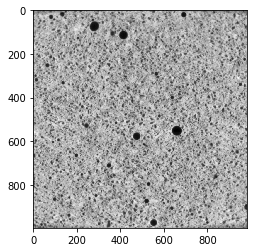

In [17]:
data_2 = np.swapaxes(data,1, 2) # change the long axis to the main direction
print ('change axis to size:', np.shape(data_2))
plt.imshow(data_2[:,:,20], cmap = 'gray')

#### 2. Clean edges that is corrupted 

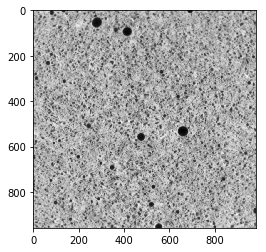

In [18]:
data_2 = np.delete(data_2, np.s_[0:20:1], 0)
data_2 = np.delete(data_2, np.s_[-20::1], 0)
plt.imshow(data_2[:,:,20], cmap = 'gray')

#### 3. Pad zero to the ideal size, making it easier to crop

In [22]:
def make_border(data, target_size, path):
    # calculate the padding size 
    top = int((target_size-np.shape(data)[0])/2) 
    bottom = top
    left = int((target_size-np.shape(data)[1])/2)
    right = left
    
    for i in range(0, np.shape(data)[2]):
        image = cv2.copyMakeBorder(data[:,:,i], top, bottom, left, right, borderType = 0)
        imageio.imwrite(path+"\\"+str(i)+'.jpg', image)   


In [27]:
ensure_dir(main_folder+'pad'+'\\') # create a folder called pad to store image that with border
make_border(data_2, target_size, main_folder+'pad')


#### 4. Crop image to small pieces

In [50]:
def read_crop_write(read_path, write_path, N_pieces): 
    # read images from folders and cropped them to N_pieces
    #images = []
    for filename in os.listdir(read_path):
        f = os.path.join(read_path,filename)
        img =cv2.imread(f, cv2.IMREAD_GRAYSCALE)
 
        I_crop_v  =  np.asarray(np.split(img, sqrt(N_pieces), axis = 0)) 
        # when split in this axis can be recovered by using I_crop_recover = I_crop_v.reshape(1024,1024)
        I_crop_vv = np.asarray(np.split(I_crop_v, sqrt(N_pieces), axis = 2))
        
        for i in range(0,int(sqrt(N_pieces))):
            for j in range (0,int(sqrt(N_pieces))):
                prefix= re.sub("\D", "", filename)
                filename_new = write_path + '\\'+ prefix + '_'+ str(i)+'_'+str(j) +'.jpg'
                cv2.imwrite(filename_new, I_crop_vv[j, i, :, :])

In [51]:
ensure_dir(main_folder+'crop'+'\\') 
# create a folder called pad to store image that with border

read_crop_write(main_folder+'pad', main_folder+'crop', N_pieces)